In [28]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from glob import glob
import numpy as np

In [29]:
files = glob('weather_data_input/weather_data_set_*')
files

['weather_data_input/weather_data_set_1900',
 'weather_data_input/weather_data_set_1901']

In [30]:
dfs = []
for path in files:
    data = pd.read_csv(path, sep='|', header=None, names=['station', 'year', 'datemonth', 'hourminute', 'temperature'])
    dfs.append(data)

In [31]:
dfs

[   station  year  datemonth  hourminute  temperature
 0     3300  1900        101         300           23
 1     3300  1900        101         400           24
 2     3300  1900        301         200           26
 3     3300  1900        305         230           24
 4     3300  1900        312         100           30
 5     3300  1900        412         300           29
 6     3301  1900        312         100           34
 7     3301  1900        412         400           23,
     station  year  datemonth  hourminute  temperature
 0      3300  1901        101         400         24.0
 1      3300  1901        101         500         45.0
 2      3300  1901        301         300         40.0
 3      3300  1901        312         200         34.0
 4      3300  1901        412         100         32.0
 5      3301  1901        312         130         22.0
 6      3301  1901        412        1500         21.0
 7      3302  1901        102         400         20.0
 8      3302  1901

In [32]:
data = pd.concat(dfs, ignore_index=True)
data

,station,year,datemonth,hourminute,temperature
0,3300,1900,101,300,23.0
1,3300,1900,101,400,24.0
2,3300,1900,301,200,26.0
3,3300,1900,305,230,24.0
4,3300,1900,312,100,30.0
5,3300,1900,412,300,29.0
6,3301,1900,312,100,34.0
7,3301,1900,412,400,23.0
8,3300,1901,101,400,24.0
9,3300,1901,101,500,45.0


In [33]:
n1 = data['temperature'].unique()
n1.sort()
n1

array([19., 20., 21., 22., 23., 24., 26., 29., 30., 32., 34., 35., 40.,
       45., nan])

In [34]:
s1 = data['temperature']
s1.loc[s1.isnull()]

21   NaN
Name: temperature, dtype: float64

In [38]:
s2 = data['temperature'].dropna()
d2 = data.loc[s2.index]
d2

,station,year,datemonth,hourminute,temperature
0,3300,1900,101,300,23.0
1,3300,1900,101,400,24.0
2,3300,1900,301,200,26.0
3,3300,1900,305,230,24.0
4,3300,1900,312,100,30.0
5,3300,1900,412,300,29.0
6,3301,1900,312,100,34.0
7,3301,1900,412,400,23.0
8,3300,1901,101,400,24.0
9,3300,1901,101,500,45.0


In [39]:
d2['year'].unique()

array([1900, 1901])

In [40]:
d3 = d2[['year', 'temperature']]
d3

,year,temperature
0,1900,23.0
1,1900,24.0
2,1900,26.0
3,1900,24.0
4,1900,30.0
5,1900,29.0
6,1900,34.0
7,1900,23.0
8,1901,24.0
9,1901,45.0


In [41]:
d3.max()

year           1901.0
temperature      45.0
dtype: float64

In [42]:
d4 = d3.groupby('year')
d4

In [44]:
d5 = d4.max()
d5

,temperature
year,
1900,34.0
1901,45.0


<AxesSubplot:xlabel='year'>

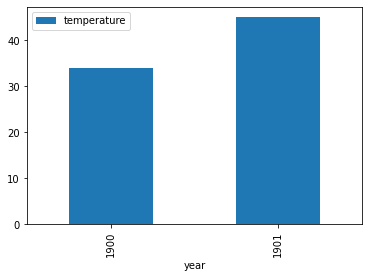

In [45]:
d5.plot(kind='bar')